## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv('Processed — Korea Income and Welfare.csv')
df.head(5)

,id,year,wave,region,income,family_member,family_size,gender,year_born,education_level,marriage,religion,occupation,reason_none_worker,company_size,company_size_category
0,10101,2005,1,Seoul,614.0,1,Small,2,1936,2,2,2,0,8,0,"Unknown, unemployed"
1,10101,2011,7,Seoul,896.0,1,Small,2,1936,2,2,2,0,10,0,"Unknown, unemployed"
2,10101,2012,8,Seoul,1310.0,1,Small,2,1936,2,2,2,0,10,0,"Unknown, unemployed"
3,10101,2013,9,Seoul,2208.0,1,Small,2,1936,2,2,2,0,1,0,"Unknown, unemployed"
4,10101,2014,10,Seoul,864.0,1,Small,2,1936,2,2,2,0,10,0,"Unknown, unemployed"


The processed dataset consists of 77 445 rows and 16 columns. The dataset contains information in different data types. There are both Numeric data (**Discrete**: year, wave, family_member, year_born, company_size; **Continuous**: income) and Categorical data (**Nominal**: id, region, marriage, occupation, reason_none_worker; **Ordinal**: family_size, education_level, company_size_category; **Binary**: gender, religion).

**Data Source**: Kaggle Website (https://www.kaggle.com/datasets/hongsean/korea-income-and-welfare)

**Description of the processed dataset**:

**id**: identification number (nominal).

**year**: The year the study was conducted (discrete).

**wave**: The wave of the study from 1st in 2005 to 14th in 2018 (discrete).

**region**: The region where the participant resides (discrete).

**income**: The participant's annual income expressed in million Korean Won (continuous).

**family_member**: The total number of family members living with the participant (discrete).

**family_size**: The category of the family according to the family members (ordinal). 

**gender**: The gender of the participant (binary).
1. male
2. female
   
**year_born**: The birth year of the participant (discrete).

**education_level**: The highest level of education attained by the participant (ordinal). 
1. no formal education (under 7 years old)
2. no formal education (7 years and older)
3. elementary school education
4. middle school education
5. high school education
6. some college education
7. university degree
8. master's degree (MA)
9. doctoral degree (PhD)

**marriage**: The current marital status of the participant (nominal).
1. not applicable (under 18)
2. married
3. separated by death
4. separated
5. not married yet
6. others

**religion**: Indicates religious affiliation (binary).
1. religious
2. non-religious

**occupation**: The code of the participant's job (nominal). There is a file called 'job_code_translated.xlsx' containing job and its code. You can find the file via the link: https://docs.google.com/spreadsheets/d/1sxFtaT5iVs49R3gaeHHIUHsx87DIwfb_/edit?usp=share_link&ouid=103272618993917701834&rtpof=true&sd=true.

**reason_none_worker**: The reason provided by the participant for not being employed (nominal).
1. Not capable of working
2. In military service
3. Enrolled in school
4. Preparing for school
5. Preparing to apply for a job
6. Household worker
7. Caring for children at home
8. Providing nursing care
9. Withdrawing from economic activities
10. No intention to work
11. Other reasons

**company_size**: The number of employees at the company where the participant works, categorized by size (discrete).

**company_size_category**: The category of the company according to the number of employees (ordinal).

## First task

### 1) Income Column: mean, median

In [3]:
income_mean = df.groupby('id')['income'].mean().mean()

print(f"The mean of income: {income_mean}")

The mean of income: 3569.318904245631


**According to the data we filtered, we figured out that the mean income is 3569 mln KRW.**

In [4]:
income_median = df.groupby('id')['income'].median().median()

print(f"The median of income: {income_median}")

The median of income: 2716.5


**According to the data we filtered, we figured out that the median of income is 2716.5. It indicates that half of the incomes are below this value, reflecting possible right skewness since the mean > median.**

### 2) Family Member Column: mean, mode, median

In [5]:
fam_mem_mean = df.groupby('id')['family_member'].mean().mean()

print(f"The mean amount of family member column: {fam_mem_mean}")

The mean amount of family member column: 2.4943731868466426


**According to the data we filtered, we figured out that the mean amount of family member is 2.**

In [6]:
fam_mem_median = df.groupby('id')['family_member'].median().median()

print(f"The median of family member column: {fam_mem_median}")

The median of family member column: 2.0


**According to the data we filtered, we figured out that the median of family member is 2, reflecting possible right skewness since the mean > median.**

In [7]:
fam_mem_dist = df.groupby('family_member')['id'].nunique().reset_index()
fam_mem_mode = fam_mem_dist.loc[fam_mem_dist['id'].idxmax()]

print(f"Family members: {fam_mem_mode['family_member']}, {fam_mem_mode['id']} observations.")

Family members: 2, 3761 observations.


**According to the data we filtered, we figured out that the mode of family member is 2. It indicates that the dataset has the largest number of small households consisting of 2 members** 

### 3) Region Column: mode

In [8]:
reg_dist = df.groupby('region')['id'].nunique().reset_index()
reg_mode = reg_dist.loc[reg_dist['id'].idxmax()]

print(f"Region: {reg_mode['region']}, {reg_mode['id']} observations.")

Region: Kyeong-gi, 2123 observations.


**According to the data we filtered, we figured out that the mode of region column is Kyeong-gi. It indicates that the dataset has the largest number of households living/lived in Kyeong-gi — 2123 observations** 

### 4) Gender Column: mode

In [9]:
gen_dist = df.groupby('gender')['id'].nunique().reset_index()
gen_dist['gender'] = gen_dist['gender'].astype('object')

gen_dist.loc[gen_dist['gender'] == 1, 'gender'] = 'male'
gen_dist.loc[gen_dist['gender'] == 2, 'gender'] = 'female'

gen_mode = gen_dist.loc[gen_dist['id'].idxmax()]

print(f"Gender: {gen_mode['gender']}, {gen_mode['id']} observations.")

Gender: male, 6326 observations.


**According to the data we filtered, we figured out that the mode of geder column is male, indicating its higher representation.**

### 5) Education Level Column: mode

In [10]:
edu_dist = df.groupby('education_level')['id'].nunique().reset_index()
edu_mode = edu_dist.loc[edu_dist['id'].idxmax()]

print(f"Education level: {edu_mode['education_level']}, {edu_mode['id']} observations.")

Education level: 5, 2736 observations.


**According to the data we filtered, we figured out that the mode of education level column is 5 (High School Education), indicating the most common level of education.**

## Second task

### Outliers in family member column

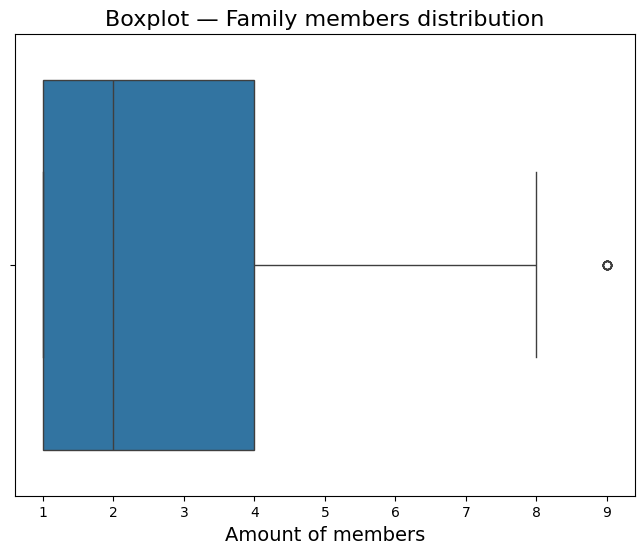

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='family_member') 

plt.title('Boxplot — Family members distribution', fontsize=16)
plt.xlabel('Amount of members', fontsize=14)

plt.show()

**Outliers are present for large family sizes that consist of more that 8 members, suggesting rarity of very large families.**

### Outliers in income column

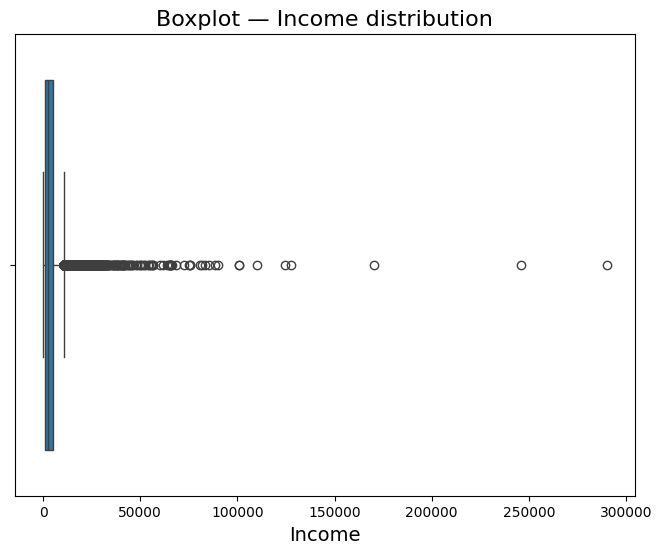

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='income')

plt.title('Boxplot — Income distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)

plt.show()

**Significant outliers are observed, indicating a few individuals with very high incomes compared to the majority.**

### Outliers in year born column

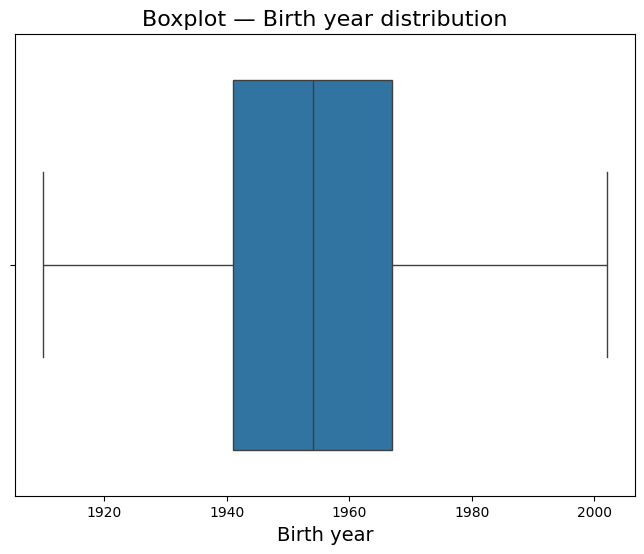

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='year_born')

plt.title('Boxplot — Birth year distribution', fontsize=16)
plt.xlabel('Birth year', fontsize=14)

plt.show()

**There are no outliers.**

## Third task

### Outliers of family member column by IQR method

In [14]:
fam_mem_ql = df['family_member'].quantile(0.25)
fam_mem_qu = df['family_member'].quantile(0.75)
fam_mem_iqr = fam_mem_qu - fam_mem_ql

fm_lower_bound = fam_mem_ql - 1.5 * fam_mem_iqr
fm_upper_bound = fam_mem_qu + 1.5 * fam_mem_iqr

fam_mem_outliers_by_iqr = df[(df['family_member'] < fm_lower_bound) | (df['family_member'] > fm_upper_bound)]
print(f'Amount of outliers by IQR method: {fam_mem_outliers_by_iqr.shape[0]}')
print(f'Thresholds: {fm_lower_bound, fm_upper_bound}')

Amount of outliers by IQR method: 9
Thresholds: (-3.5, 8.5)


### Outliers of family member column by std method

In [15]:
fam_mem_sd = df['family_member'].std()
fam_mem_mean = df['family_member'].mean()

fam_mem_outliers_by_std = df[(df['family_member'] < fam_mem_mean - fam_mem_sd * 3) | (df['family_member'] > fam_mem_mean + fam_mem_sd * 3)]
print(f'Amount of outliers by std method: {fam_mem_outliers_by_std.shape[0]}')
print(f'Thresholds: {fam_mem_mean - fam_mem_sd * 3, fam_mem_mean + fam_mem_sd * 3}')

Amount of outliers by std method: 219
Thresholds: (-1.4079157074397584, 6.491394305154265)


**According to the data we analyzed, we figured out that the IQR method provides less outliers, indicating that the threshold is higher that it is in std method.**

### Outliers of income column by IQR method

In [16]:
income_ql = df['income'].quantile(0.25)
income_qu = df['income'].quantile(0.75)
income_iqr = income_qu - income_ql

inc_lower_bound = income_ql - 1.5 * income_iqr
inc_upper_bound = income_qu + 1.5 * income_iqr

inc_outliers_by_iqr = df[(df['income'] < inc_lower_bound) | (df['income'] > inc_upper_bound)]

print(f'Amount of outliers by IQR method: {inc_outliers_by_iqr.shape[0]}')
print(f'Thresholds: {inc_lower_bound, inc_upper_bound}')

Amount of outliers by IQR method: 2878
Thresholds: (-4476.5, 10687.5)


### Outliers of income column by std method

In [17]:
inc_sd = df['income'].std()
inc_mean = df['income'].mean()

inc_outliers_by_std = df[(df['income'] < inc_mean - inc_sd * 3) | (df['income'] > inc_mean + inc_sd * 3)]
print(f'Amount of outliers by std method: {inc_outliers_by_std.shape[0]}')
print(f'Thresholds: {inc_mean - inc_sd * 3, inc_mean + inc_sd * 3}')

Amount of outliers by std method: 733
Thresholds: (-8218.15499825188, 15524.962587646936)


**According to the data we analyzed, we figured out that the IQR method provides more outliers, indicating that the threshold is lower than it is in std method.**

## Fourth task

### We decided to use method that shows the least number of outliers, and not to delete outliers.

### Income column (std method)

In [18]:
df1 = df.copy()
df1.loc[df1['income'].isin(inc_outliers_by_std['income']), 'income'] = df1['income'].mean()

In [19]:
new_inc_mean = df1.groupby('id')['income'].mean().mean()
new_inc_med = df1.groupby('id')['income'].median().median()

print(f"The mean of income column: {new_inc_mean}")
print(f"The median of income column: {new_inc_med}")

The mean of income column: 3360.9306659633507
The median of income column: 2716.5


**According to the data we analyzed, we figured out that the mean has been changed from 3569 to 3361, and the median has not been changed.**

### Family member column (IQR method)

In [21]:
df.loc[df['family_member'].isin(fam_mem_outliers_by_iqr['family_member']), 'family_member'] = round(df['family_member'].mean())
new_fm_mean = df['family_member'].mean()
new_fm_dist = df.groupby('family_member')['id'].nunique().reset_index()
new_fm_mode = new_fm_dist.loc[new_fm_dist['id'].idxmax()]
new_fm_median = df.groupby('id')['family_member'].median().median()

print(f"The mean of family member column: {new_fm_mean}")
print(f"The median of family member column: {new_fm_median}")
print(f"Family members: {new_fm_mode['family_member']}, {new_fm_mode['id']} observations.")

The mean of family member column: 2.5409887746618858
The median of family member column: 2.0
Family members: 2.0, 3761.0 observations.


**According to the data we analyzed, we figured out that the mean has been changed from 2.49 to 2.54, the median and mode have not been changed.**

## Fifth task

**There are no Nan values in the dataset**

In [19]:
df.isnull().any().any()

False

## Sixth task

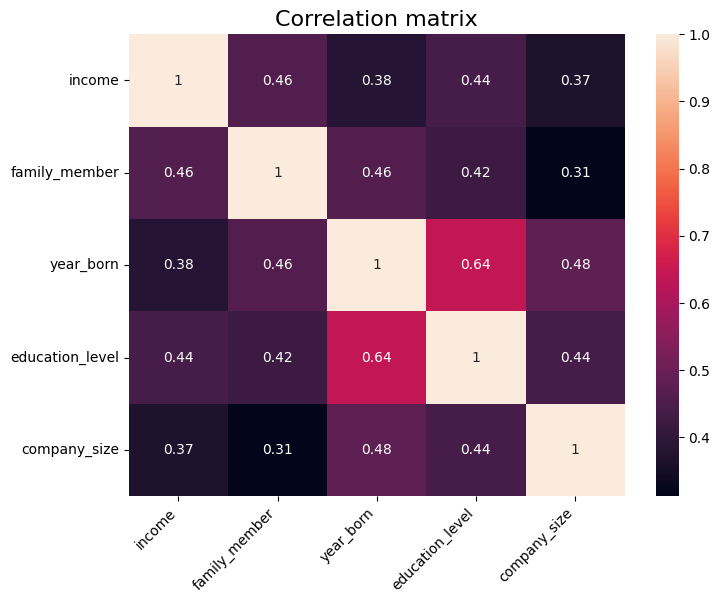

In [8]:
df_for_cor = df[['income', 'family_member', 'year_born', 'education_level', 'company_size']]

correlation_matrix = df_for_cor.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.show()

## Seventh task

- Income — Family Member (0.46): There is a moderate positive correlation between income and the number of family members. This suggests that people with larger families tend to have higher incomes, although the relationship is not very strong.

- Income — Year Born (0.38): A weak to moderate positive correlation. Younger individuals may have slightly higher incomes, but the relationship isn't substantial.

- Income — Education Level (0.44): A moderate positive correlation, indicating that higher education levels are generally associated with higher incomes.

- Income — Company Size (0.37): A weak to moderate positive correlation, implying that individuals working in larger companies may have slightly higher incomes.

- Family Member — Year Born (0.47): A moderate positive correlation. This could mean that younger individuals tend to have a few more family members compared to older individuals.

- Family Member — Education Level (0.43): A moderate positive correlation. This might suggest a trend where individuals with more education have larger families, though the relationship isn't very strong.

- Family Member — Company Size (0.32): A weak positive correlation. There might be a minor tendency for people in larger companies to have more family members.

- Year Born — Education Level (0.64): A strong positive correlation. This indicates that younger individuals tend to have higher education levels, likely reflecting changing norms and access to education over generations.

- Year Born — Company Size (0.48): A moderate positive correlation. Younger individuals may tend to work in larger companies compared to those from earlier generations.

- Education Level — Company Size (0.44): A moderate positive correlation. This suggests that individuals with higher education levels might be employed in larger companies more often.

## Eighth task

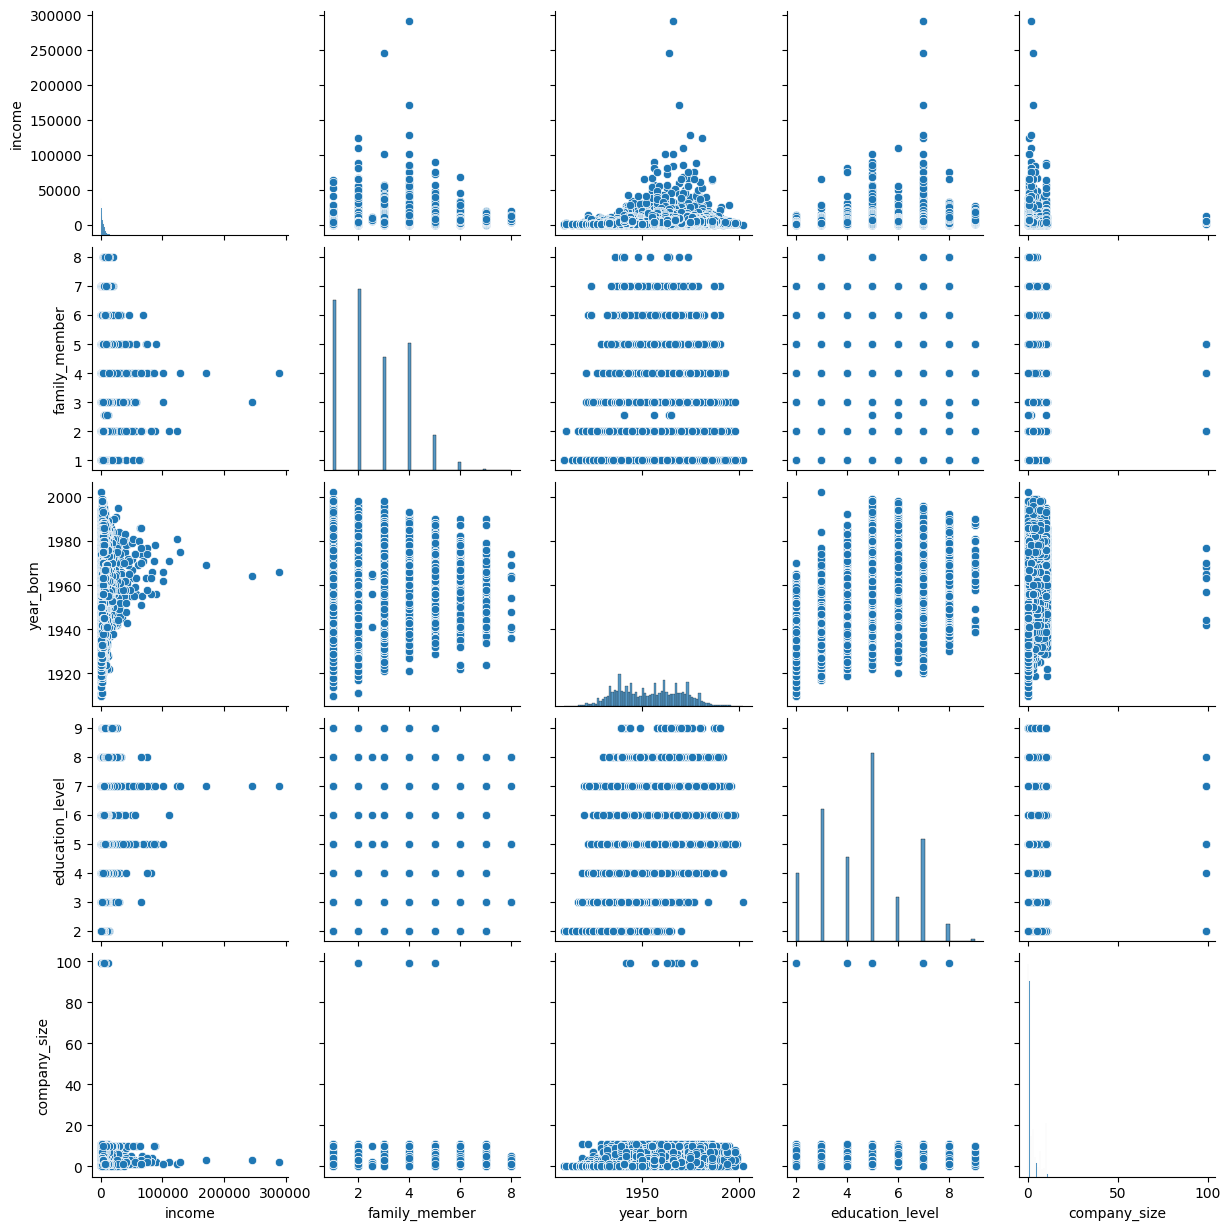

In [24]:
sns.pairplot(df_for_cor)
plt.show()

## Ninth task

**The task is a regression problem, as the goal is to predict the numerical target variable — income.**

## Tenth – Twelfth tasks

### Encode categorical features

In [25]:
df_to_encode = df[['region', 'gender', 'marriage', 'religion']] Nan

onehot_encoder = OneHotEncoder(sparse_output=False) 

encoded_data = onehot_encoder.fit_transform(df_to_encode)

feature_names = onehot_encoder.get_feature_names_out(['region', 'gender', 'marriage', 'religion'])

new_df = pd.concat([df[['year', 'family_member', 'year_born', 'education_level']], 
           pd.DataFrame(encoded_data, columns=feature_names).astype(int)], axis=1)

### First experimental data

In [26]:
X = new_df
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model1 = LinearRegression()

model1.fit(X_train, y_train)
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**(1/2)

print(f"R^2: {r2}, RMSE: {rmse}")

R^2: 0.27104735755587805, RMSE: 3655.3964139416535


### Second experimental data

In [27]:
X = df[['family_member', 'year_born', 'education_level']]
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model2 = LinearRegression()

model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**(1/2)

print(f"R^2: {r2}, RMSE: {rmse}")

R^2: 0.24046060705214534, RMSE: 3731.298346851399


**According to the data we analyzed, we figured out that the performance of model1 (R^2: 0.27, RMSE: 3655.3) is better than the performance of model2 (R^2: 0.24, RMSE: 3731.3). It indicates that values with relative high correlations can not ensure that the prediction will be more accurate.**

## Conclusion

**In this study, we explored the relationship  between education, family dynamics, and income. We revealed moderate correlations between income and factors such as education level, family size, and company size. These results emphasize the diverse income determinants.**

**Outlier analysis highlighted significant deviations in income distributions, reflecting diverse socio-economic conditions. While correlations like education and income were expected, the regression analysis revealed that higher correlation values do not necessarily enhance predictive accuracy. This insight emphasizes the complexity of modeling real-world socio-economic behaviors.**